# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup

import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) ##cambiar a 1500!!!!
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)#cambiar a 1500!!!!!!!
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

units="metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed'] #AQUI TENGO DUDA DE QUE TENGO QUE PONER
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | manggar
Processing Record 2 of Set 1 | castro
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | asfi
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | dwarka
Processing Record 7 of Set 1 | carnarvon
Processing Record 8 of Set 1 | peno
Processing Record 9 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 10 of Set 1 | kjopsvik
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | san cristobal
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | revelstoke
Processing Record 16 of Set 1 | tingrela
City not found. Skipping...
Processing Record 17 of Set 1 | tuktoyaktuk
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | goundi
Processing Record 20 of Set 1 | chuy
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | port bl

Processing Record 35 of Set 4 | paducah
Processing Record 36 of Set 4 | cockburn town
Processing Record 37 of Set 4 | nguiu
City not found. Skipping...
Processing Record 38 of Set 4 | qaanaaq
Processing Record 39 of Set 4 | batsfjord
Processing Record 40 of Set 4 | kudahuvadhoo
Processing Record 41 of Set 4 | naryan-mar
Processing Record 42 of Set 4 | santa isabel
Processing Record 43 of Set 4 | urucara
Processing Record 44 of Set 4 | burica
City not found. Skipping...
Processing Record 45 of Set 4 | smithers
Processing Record 46 of Set 4 | chokurdakh
Processing Record 47 of Set 4 | chicama
Processing Record 48 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 49 of Set 4 | hanko
Processing Record 0 of Set 5 | kamenka
Processing Record 1 of Set 5 | erenhot
Processing Record 2 of Set 5 | egvekinot
Processing Record 3 of Set 5 | omsukchan
Processing Record 4 of Set 5 | mattru
Processing Record 5 of Set 5 | inhambane
Processing Record 6 of Set 5 | talnakh
Processing Rec

Processing Record 24 of Set 8 | sapa
Processing Record 25 of Set 8 | tambura
Processing Record 26 of Set 8 | burnie
Processing Record 27 of Set 8 | san luis
Processing Record 28 of Set 8 | alghero
Processing Record 29 of Set 8 | henties bay
Processing Record 30 of Set 8 | kashi
Processing Record 31 of Set 8 | batemans bay
Processing Record 32 of Set 8 | shingu
Processing Record 33 of Set 8 | lucea
Processing Record 34 of Set 8 | mackenzie
Processing Record 35 of Set 8 | toritama
Processing Record 36 of Set 8 | aykhal
Processing Record 37 of Set 8 | russell
Processing Record 38 of Set 8 | prince rupert
Processing Record 39 of Set 8 | ambilobe
Processing Record 40 of Set 8 | kiama
Processing Record 41 of Set 8 | mananara
Processing Record 42 of Set 8 | mezen
Processing Record 43 of Set 8 | odweyne
Processing Record 44 of Set 8 | matara
Processing Record 45 of Set 8 | shimoda
Processing Record 46 of Set 8 | bucerias
Processing Record 47 of Set 8 | aklavik
Processing Record 48 of Set 8 | m

Processing Record 15 of Set 12 | rawson
Processing Record 16 of Set 12 | crab hill
City not found. Skipping...
Processing Record 17 of Set 12 | waipawa
Processing Record 18 of Set 12 | luklukan
Processing Record 19 of Set 12 | zaraza
Processing Record 20 of Set 12 | zhuanghe
Processing Record 21 of Set 12 | kalaleh
Processing Record 22 of Set 12 | puerto cortes
City not found. Skipping...
Processing Record 23 of Set 12 | felanitx
Processing Record 24 of Set 12 | maykain
City not found. Skipping...
Processing Record 25 of Set 12 | tawzar
City not found. Skipping...
Processing Record 26 of Set 12 | madang
Processing Record 27 of Set 12 | muskogee
Processing Record 28 of Set 12 | zhaozhou
Processing Record 29 of Set 12 | chagda
City not found. Skipping...
Processing Record 30 of Set 12 | tabou
Processing Record 31 of Set 12 | nouadhibou
Processing Record 32 of Set 12 | haines junction
Processing Record 33 of Set 12 | sete
Processing Record 34 of Set 12 | wasilla
Processing Record 35 of Se

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df=pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,manggar,-2.8833,108.2667,24.88,86,99,1.80,ID,1676232355
1,castro,-24.7911,-50.0119,22.57,85,63,0.22,BR,1676232356
2,hobart,-42.8794,147.3294,11.70,74,75,3.60,AU,1676232303
3,asfi,32.2994,-9.2372,17.46,59,100,6.70,MA,1676232158
4,rikitea,-23.1203,-134.9692,25.75,68,47,1.32,PF,1676232358


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv")
del city_data_df[city_data_df.columns[0]]

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,manggar,-2.8833,108.2667,24.88,86,99,1.80,ID,1676232355
1,castro,-24.7911,-50.0119,22.57,85,63,0.22,BR,1676232356
2,hobart,-42.8794,147.3294,11.70,74,75,3.60,AU,1676232303
3,asfi,32.2994,-9.2372,17.46,59,100,6.70,MA,1676232158
4,rikitea,-23.1203,-134.9692,25.75,68,47,1.32,PF,1676232358


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

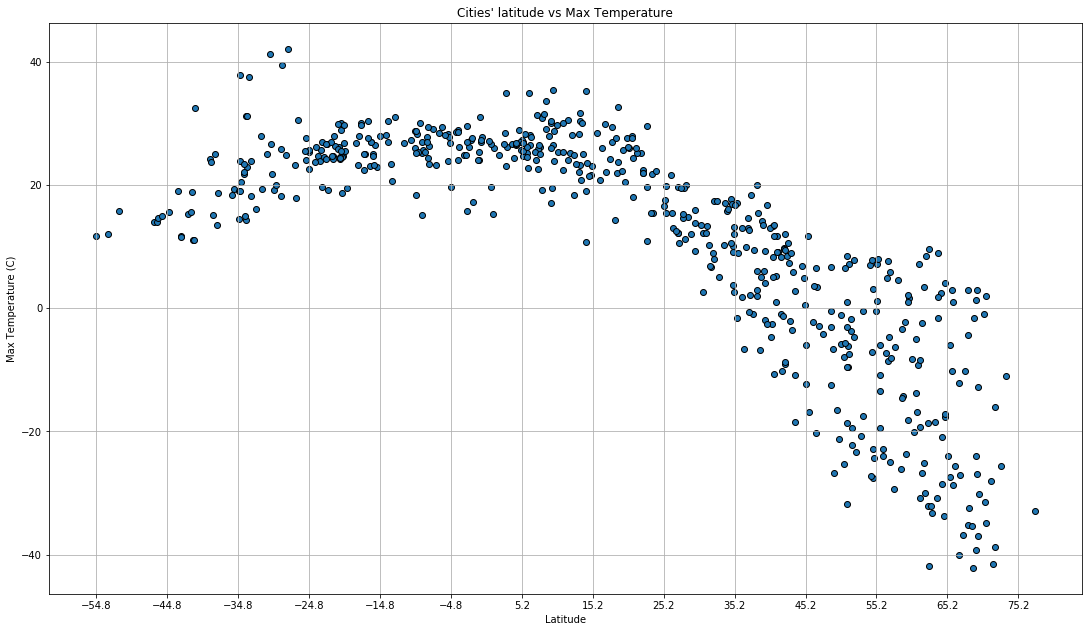

In [9]:
# Build scatter plot for latitude vs. temperature
x_lat=city_data_df.iloc[:,1]
y_temp=city_data_df.iloc[:,3]
fig1, ax1 =plt.subplots()
ax1.scatter(x_lat,y_temp,edgecolors='black')


# Incorporate the other graph properties
ax1.set_title("Cities' latitude vs Max Temperature")
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Max Temperature (C)")
ax1.grid()
fig1.set_size_inches(18.5, 10.5)
plt.xticks(np.arange(min(x_lat),max(x_lat)+3,10.0))
ax1.grid(True)

# Save the figure
fig1.savefig("../output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

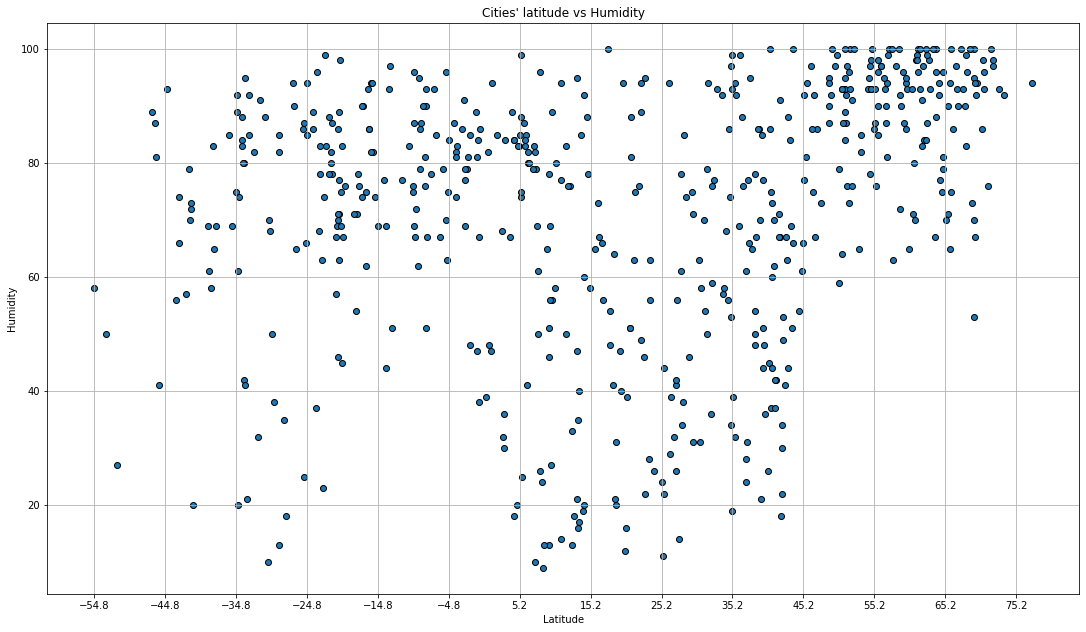

In [10]:
# Build scatter plot for latitude vs. temperature
x_lat=city_data_df.iloc[:,1]
y_temp=city_data_df.iloc[:,4]
fig2, ax2 =plt.subplots()
ax2.scatter(x_lat,y_temp,edgecolors='black')


# Incorporate the other graph properties
ax2.set_title("Cities' latitude vs Humidity")
ax2.set_xlabel("Latitude")
ax2.set_ylabel("Humidity")
ax2.grid()
fig2.set_size_inches(18.5, 10.5)
plt.xticks(np.arange(min(x_lat),max(x_lat)+3,10.0))
ax2.grid(True)

# Save the figure
fig2.savefig("../output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

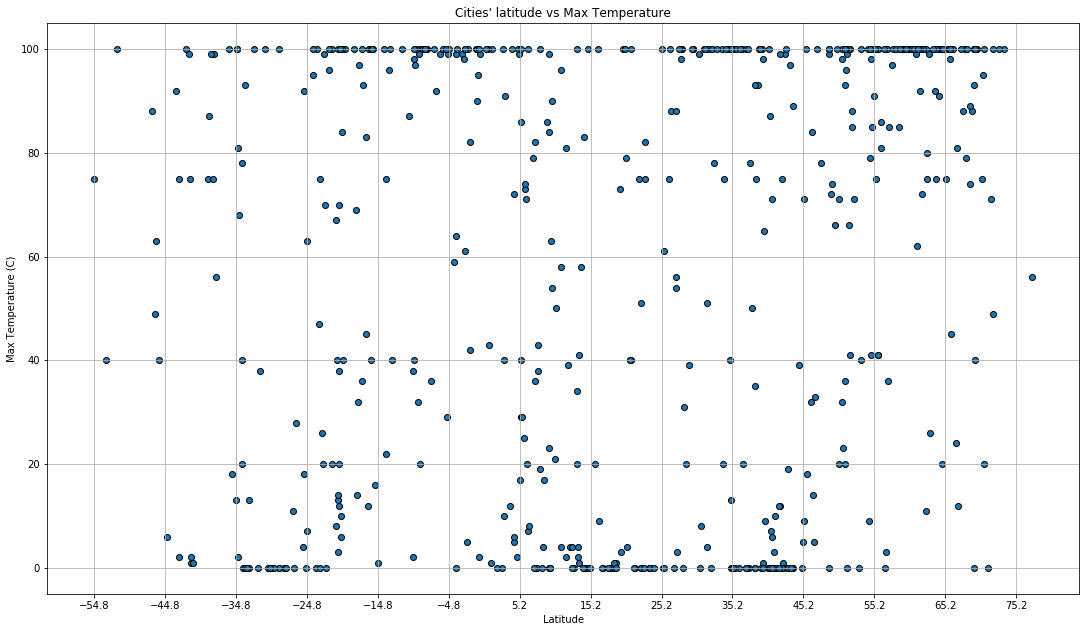

In [11]:
# Build scatter plot for latitude vs. temperature
x_lat=city_data_df.iloc[:,1]
y_temp=city_data_df.iloc[:,5]
fig3, ax3 =plt.subplots()
ax3.scatter(x_lat,y_temp,edgecolors='black')


# Incorporate the other graph properties
ax3.set_title("Cities' latitude vs Max Temperature")
ax3.set_xlabel("Latitude")
ax3.set_ylabel("Max Temperature (C)")
ax3.grid()
fig3.set_size_inches(18.5, 10.5)
plt.xticks(np.arange(min(x_lat),max(x_lat)+3,10.0))
ax3.grid(True)

# Save the figure
fig3.savefig("../output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

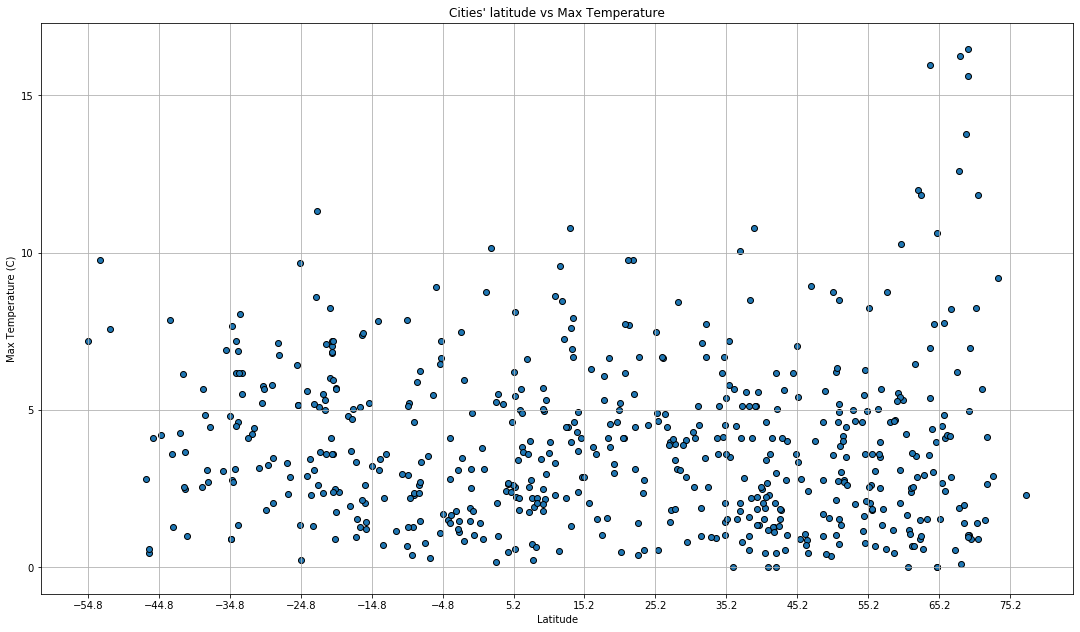

In [12]:
# Build scatter plot for latitude vs. temperature
x_lat=city_data_df.iloc[:,1]
y_temp=city_data_df.iloc[:,6]
fig4, ax4 =plt.subplots()
ax4.scatter(x_lat,y_temp,edgecolors='black')


# Incorporate the other graph properties
ax4.set_title("Cities' latitude vs Max Temperature")
ax4.set_xlabel("Latitude")
ax4.set_ylabel("Max Temperature (C)")
ax4.grid()
fig4.set_size_inches(18.5, 10.5)
plt.xticks(np.arange(min(x_lat),max(x_lat)+3,10.0))
plt.yticks(np.arange(min(y_temp),max(y_temp)+3,5))
ax4.grid(True)

# Save the figure
fig4.savefig("../output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def LinRegress(x,y,xlabel,ylabel):
    correlation=st.pearsonr(x,y)
    (slope, intercept, rvalue, pvalue, stderr)=linregress(x,y)
    regress_values = x * slope + intercept
    line_eq="y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(min(x),min(y)),fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    print(f"The correlation between {xlabel} and {ylabel} is {round(correlation[0],2)}")
    plt.show()
    print(correlation)


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df["Lat"] >= 0].reset_index(drop=True)
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,asfi,32.2994,-9.2372,17.46,59,100,6.70,MA,1676232158
1,dwarka,22.2394,68.9678,22.45,49,0,5.50,IN,1676232359
2,peno,56.9262,32.7426,-4.73,94,100,3.51,RU,1676232361
3,kjopsvik,68.0970,16.3742,2.93,83,100,16.25,NO,1676232363
4,san cristobal,7.7669,-72.2250,26.10,50,43,2.19,VE,1676232367


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df["Lat"]<0].reset_index(drop=True)
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,manggar,-2.8833,108.2667,24.88,86,99,1.80,ID,1676232355
1,castro,-24.7911,-50.0119,22.57,85,63,0.22,BR,1676232356
2,hobart,-42.8794,147.3294,11.70,74,75,3.60,AU,1676232303
3,rikitea,-23.1203,-134.9692,25.75,68,47,1.32,PF,1676232358
4,carnarvon,-24.8667,113.6333,25.38,66,0,9.67,AU,1676232360


###  Temperature vs. Latitude Linear Regression Plot

The correlation between Latitude and Max Temperature is -0.86


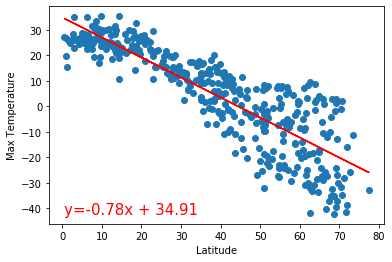

(-0.8598361033952593, 3.314653166244083e-116)


In [16]:
# Linear regression on Northern Hemisphere
lat_north = northern_hemi_df["Lat"]
temp_north = northern_hemi_df["Max Temp"]
LinRegress(lat_north,temp_north,"Latitude","Max Temperature")


The correlation between Latitude and Max Temperature is 0.47


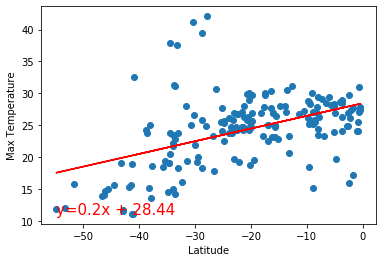

(0.47003344921969425, 3.6047817924760396e-11)


In [17]:
lat_south = southern_hemi_df["Lat"]
temp_south = southern_hemi_df["Max Temp"]
LinRegress(lat_south,temp_south,"Latitude","Max Temperature")


**Discussion about the linear relationship:** While in the northern hemisphere we can see a good correlation between the latitude and the maximum temperature with an 86% certainty to predict future temperatures with given altitude, we can confirm that our regression model is good by looking at the significance.We have a low significance which just confirms that we have a strong correlation between our 2 factors.

However, the regression model for the southern hemisphere of latitude vs temperature has a weak correlation, showing  a pearson correlation of only 47%, and a not so low significance which confirms our hypothesis; there is no correlation between the southern hemisphere's latitude and the temperature for these cities located in the southern hemisphere. Our significance is also not as low so we can be certain of our hypothesis; No correlation in between latitude and temperature in southern hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The correlation between Latitude and Humidity is 0.5


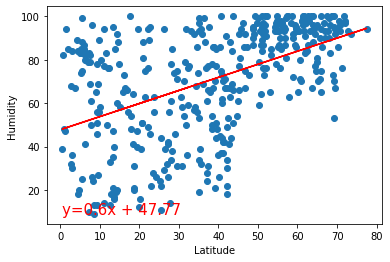

(0.4956370930337326, 9.373277920089681e-26)


In [18]:
# Northern Hemisphere
humidity_north = northern_hemi_df["Humidity"]
LinRegress(lat_north,humidity_north,"Latitude","Humidity")

The correlation between Latitude and Humidity is 0.24


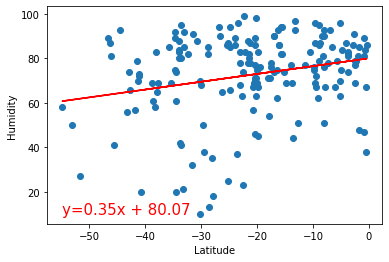

(0.2426894529733243, 0.0010984874857989644)


In [19]:
# Southern Hemisphere
humidity_south = southern_hemi_df["Humidity"]
LinRegress(lat_south,humidity_south,"Latitude","Humidity")

**Discussion about the linear relationship:** For both hemispheres we see no correlation between humidity and latitude so we can just discard the humidity variable all together for future studies. For the northern hemisphere we have a correlation of 50% and a not so low significance which helps us confirme our hypothesis; no correlation. 

Same thing happens with the southern hemisphere, we observe a correlation of 24% and a high significance so we can confirm that this set of data would NOT be useful to predict humidity considering only the latitude of the different cities.

### Cloudiness vs. Latitude Linear Regression Plot

The correlation between Latitude and Cloudiness is 0.37


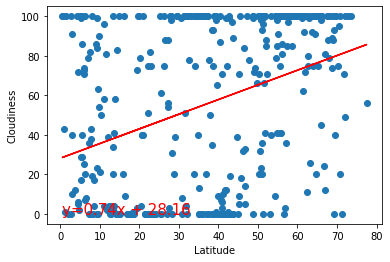

(0.3665038148908228, 6.130793167551906e-14)


In [20]:
# Northern Hemisphere

cloud_north = northern_hemi_df["Cloudiness"]
LinRegress(lat_north,cloud_north,"Latitude","Cloudiness")

The correlation between Latitude and Cloudiness is 0.29


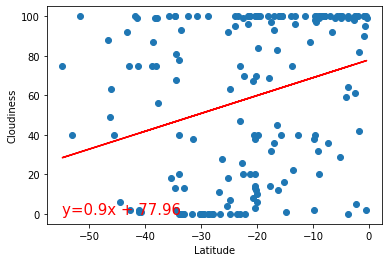

(0.2892119243267289, 9.025828985161187e-05)


In [21]:
# Southern Hemisphere
cloud_south = southern_hemi_df["Cloudiness"]
LinRegress(lat_south,cloud_south,"Latitude","Cloudiness")

**Discussion about the linear relationship:** For both hemispheres we see no correlation between latitude and cloudiness so we can just discard the cloudiness variable all together for future studies. For the northern hemisphere we have a correlation of 37% and a not high significance which helps us confirme our hypothesis; no correlation. 

Same thing happens with the southern hemisphere, we observe a correlation of 29% and a high significance so we can confirm that this set of data would NOT be useful to predict humidity considering only the latitude of the different cities.

### Wind Speed vs. Latitude Linear Regression Plot

The correlation between Latitude and Wind Speed is 0.04


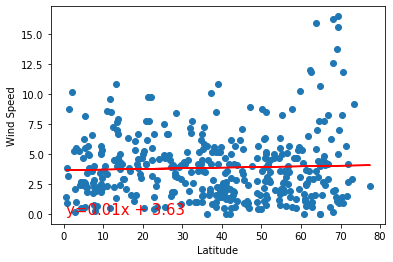

(0.039564193404656084, 0.4341337653738704)


In [22]:
# Northern Hemisphere
wind_north = northern_hemi_df["Wind Speed"]
LinRegress(lat_north,wind_north,"Latitude","Wind Speed")

The correlation between Latitude and Wind Speed is -0.22


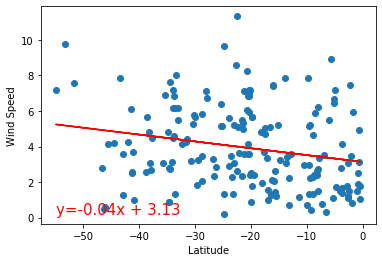

(-0.21726519187509624, 0.0035781711186575714)


In [23]:
# Southern Hemisphere

wind_south = southern_hemi_df["Wind Speed"]
LinRegress(lat_south,wind_south,"Latitude","Wind Speed")

**Discussion about the linear relationship:** For both hemispheres we see no correlation between Wind Speed and Latitude so we can just discard the Wind Speed variable all together for future studies. For the northern hemisphere we have a correlation of 4% and a not so low significance which helps us confirme our hypothesis; no correlation. 

Same thing happens with the southern hemisphere, we observe a correlation of 22% and a high significance so we can confirm that this set of data would NOT be useful to predict humidity considering only the latitude of the different cities.